In [2]:
speed=[4,4,7,7,8,9,10,10,10,11,11,12,12,12,12,13,13,13,13,14,14,14,14,15,15,15,16,16,17,17,17,18,18,18,18,19,19,19,20,20,20,20,20,22,23,24,24,24,24,25]
dist=[2,10,4,22,16,10,18,26,34,17,28,14,20,24,28,26,34,34,46,26,36,60,80,20,26,54,32,40,32,40,50,42,56,76,84,36,46,68,32,48,52,56,64,66,54,70,92,93,120,85]

In [4]:
0import pandas as pd

df=pd.DataFrame()
df['speed'] =speed
df['dist'] =dist
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


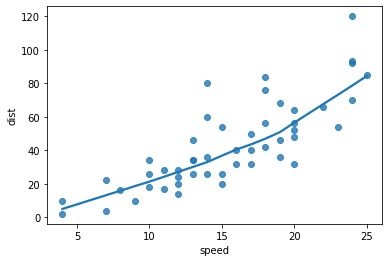

In [5]:
import seaborn as sns

sns.regplot('speed', 'dist', lowess=True, data = df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

Text(0.5, 1.0, 'Distance')

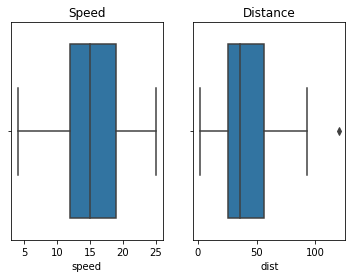

In [6]:
import matplotlib.pyplot as plt

# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 상자 그림을 첫번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('speed', data=df, ax=ax1, orient='v')
ax1.set_title('Speed')

# dist의 상자 그림을 두번째(ax2)로 그린다.
sns.boxplot('dist', data=df, ax=ax2, orient='v')
ax2.set_title('Distance')

Text(0.5, 1.0, 'Distance')

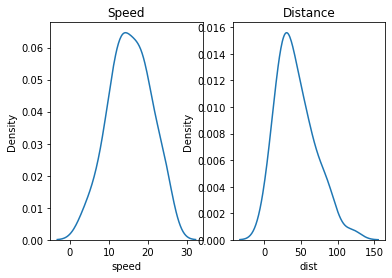

In [7]:
# 정규분포
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('Speed')

# dist의 밀도 플롯
sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('Distance')

#### 회기분석 공식 이해












































































In [12]:
import numpy as np
import pandas as pd

x=[20,25,30,34,40]
y=[26,30,40,48,66]

df=pd.DataFrame()
df['x']=x
df['y']=y

# 분산
print(np.var(x)) # 모분산
print(df['x'].var()) # 표본 분산

# 표준편차
print(np.sqrt(np.var(x))) 
print(np.sqrt(df['x'].var()))

48.160000000000004
60.2
6.939740629158989
7.758865896508329


#### sklearn을 이용한 회기분석 샘플

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [14]:
##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='test')

In [15]:
train_df.head()

,Father,Son
0,165.100,151.892
1,165.100,160.782
2,167.132,159.512
3,155.194,163.322
4,160.020,163.068


In [16]:
##########데이터 전처리
x_train_df = train_df.drop(['Son'], axis=1)
y_train_df = train_df['Son']

x_test_df = test_df.drop(['Son'], axis=1)
y_test_df = test_df['Son']

In [17]:
#데이터프레임을 지원하지 않는 머신러닝 프레임워크도 있기 때문에 데이터프레임을 넘파이 배열로 변환
x_train = x_train_df.to_numpy() 
x_test = x_test_df.to_numpy()

y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()

In [18]:
# LinearRegression 객체(인스턴스) 생성
model = LinearRegression()

##########모델 학습
model.fit(x_train, y_train)

LinearRegression()

In [19]:
model.coef_, model.intercept_

(array([0.51820601]), 85.30837062148488)

In [21]:
# 
x_train[0],  x_train[0]*model.coef_+model.intercept_ 

(array([165.1]), array([170.86418334]))

In [22]:
model.predict([x_train[0]])

array([170.86418334])

- 스칼라: a=3, b=4
- 벡터(크기와 방향을 갖고있는 스칼라 집합): [3], [3,4] => [2,3], [3, 4, 5]
- 어레이:[[1,2,3], [4,5,6]]
- 텐서: [[[1,2,3], [4,5,6]]]


In [23]:
import pandas as pd

df=pd.DataFrame({'실제값':y_train,'예측값':model.predict(x_train)})
df['오차']=abs(df['실제값']-df['예측값'])
mae=df['오차'].mean()
mae

4.850241554699021

In [24]:
df[df['오차']>10].index


Int64Index([  0,   1,   2,   7,  29,  33, 112, 135, 136, 139, 140, 144, 145,
            146, 147, 149, 152, 153, 157, 159, 161, 170, 188, 279, 286, 287,
            291, 294, 295, 296, 297, 302, 304, 306, 307, 318, 337, 429, 430,
            436, 438, 439, 440, 443, 444, 445, 450, 452, 456, 458, 469, 491,
            549, 562, 563, 564, 575, 583, 584, 589, 591, 592, 593, 594, 600,
            602, 609, 620, 637, 728, 736, 737, 742, 743, 747, 748, 749, 751],
           dtype='int64')

(array([229., 187., 155.,  88.,  45.,  22.,  13.,   7.,   4.,   5.]),
 array([1.68426151e-03, 2.28903776e+00, 4.57639126e+00, 6.86374476e+00,
        9.15109825e+00, 1.14384518e+01, 1.37258053e+01, 1.60131587e+01,
        1.83005122e+01, 2.05878657e+01, 2.28752192e+01]),
 <a list of 10 Patch objects>)

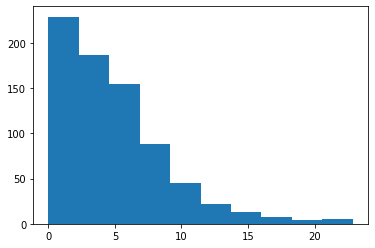

In [25]:
import matplotlib.pyplot as plt
plt.hist(df['오차'])

In [26]:
df.loc[df[df['오차']>10].index]

,실제값,예측값,오차
0,151.892,170.864183,18.972183
1,160.782,170.864183,10.082183
2,159.512,171.917178,12.405178
7,162.560,173.496670,10.936670
29,168.656,179.814638,11.158638
...,...,...,...
743,187.452,175.602659,11.849341
747,192.024,181.525754,10.498246
748,196.088,177.313775,18.774225
749,195.072,180.867632,14.204368


In [27]:
err=[10,20,30,40]

for x in err:
    display(df.loc[df[df['오차']>x].index])

,실제값,예측값,오차
0,151.892,170.864183,18.972183
1,160.782,170.864183,10.082183
2,159.512,171.917178,12.405178
7,162.560,173.496670,10.936670
29,168.656,179.814638,11.158638
...,...,...,...
743,187.452,175.602659,11.849341
747,192.024,181.525754,10.498246
748,196.088,177.313775,18.774225
749,195.072,180.867632,14.204368


,실제값,예측값,오차
139,188.722,168.363321,20.358679
294,196.088,175.207786,20.880214
297,148.590,169.547940,20.957940
444,198.628,177.577024,21.050976
593,199.136,176.260781,22.875219
594,155.448,177.708648,22.260648


,실제값,예측값,오차


,실제값,예측값,오차
